In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from ipywidgets import interact, FloatSlider
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [2]:
N = 100
points = {0: ["Positive", np.random.normal(loc=-1, scale=1, size=N), "blue"],
          1: ["Negative", np.random.normal(loc=1, scale=1, size=N), "red"]}
X = np.concatenate([points[0][1], points[1][1]])
y = np.concatenate([np.zeros(N), np.ones(N)])
def interactive_roc(threshold=0.0):
    scores = -X
    fpf_full, tpf_full, _ = roc_curve(y, scores, pos_label=0)
    auc_score = roc_auc_score(y, scores)
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    x = np.linspace(-4, 4, 500)
    for k, v in points.items():
        kde = gaussian_kde(v[1])
        density = kde(x)
        #plt.plot(x, density,  color=v[2], alpha=0.7)
        ax[0].fill_between(x, 0, density, color=v[2], alpha=0.2)
        ax[0].scatter(v[1], -.01*(k+0.5)*np.array([1]*N),
                    label=v[0], color=v[2], alpha=0.5, s=10)
        if k == 0:
          tp = np.sum(v[1] <= threshold)
          fn = np.sum(v[1] > threshold)
          ax[0].fill_between(x, 0, density, where=(x > threshold), color="red", alpha=0.6, label="FN probability")
        else:
          fp = np.sum(v[1] <= threshold)
          ax[0].fill_between(x, 0, density, where=(x <= threshold), color="blue", alpha=0.6, label="FP probability")
          tn = np.sum(v[1] > threshold)


    ax[0].axvline(threshold, color="green", linestyle="--", label="threshold")

    ax[0].text(0.75, 0.35, f"TP: {tp}", transform=ax[0].transAxes, fontsize=10)
    ax[0].text(0.75, 0.30, f"FP: {fp}", transform=ax[0].transAxes, fontsize=10)
    ax[0].text(0.75, 0.25, f"TN: {tn}", transform=ax[0].transAxes, fontsize=10)
    ax[0].text(0.75, 0.20, f"FN: {fn}", transform=ax[0].transAxes, fontsize=10)

    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Density")
    ax[0].legend(loc="upper right")


    tpf = tp/N
    fpf = fp/N
    ax[1].plot(fpf_full, tpf_full, color='black', lw=2,
          label=f'ROC (AUC = {auc_score:.2f})')
    ax[1].scatter(fpf, tpf, color="black", label=f'Threshold ({threshold:.1f})')
    ax[1].set_xlim(-0.05, 1.05)
    ax[1].set_ylim(-0.05, 1.05)
    ax[1].plot((fpf, fpf), (0, tpf), linestyle='dashed', color="red")
    ax[1].plot((1, fpf), (tpf, tpf), linestyle='dashed', color="blue")
    ax[1].plot((0,1), (0,1), linestyle='dashed', color="black", label="Random")
    ax[1].set_xlabel("False Positive Fraction - FPF")
    ax[1].set_ylabel("True Positive Fraction - TPF")
    ax[1].set_title("ROC Curve")
    ax[1].set_aspect("equal")
    ax[1].legend(loc="lower right")
    ax[1].grid(True)
    ax[1].fill_between(fpf_full, tpf_full, color='skyblue', alpha=0.3, label='Área bajo la curva (AUC)')
    plt.tight_layout()
    plt.show()

min_threshold = np.min(X) - 0.1
max_threshold = np.max(X) + 0.1


# **Receiver Operating Characteristic curve (ROC curve)**

Given a two-class classification problem ($\omega_1$ and $\omega_2$), we denote the **Type I Error** (**error probability of the false positive**) with $\alpha$, and let $\beta$ be the **Type II Error** (**error probability of a false negative**).

As we saw previously,
> The **total error** is equal to $\alpha+\beta$.

> The **sensitivity** or **recall** (**True Positive Fraction TPF**) is
$$ \frac{TP}{p}=1-\alpha$$

> The **FP-rate** (**False Positive Fraction FPF**) is
$$ \frac{FP}{n} = \alpha = 1- \text{specifity}$$

where $TP$, $FP$, $FN$ and $TN$ are the True positive, false negative, false negative and true false, respectively. The number of true positive is denoted by $p$ and the number of true negative with $n$.

When we have a parametric classifier, by moving a parameter, we can obtain different values of $\alpha$ and $\beta$.



For example, we assume that there are points on the line, the positive class (blue) and the negative class (red). Our classifier is a threshold point, which classifies the points to its left as positive and the points to its right as negative.

> We can move it from the minimum of class $\omega_1$ to the maximum of class $\omega_2$, but realistically the range is from the minimum of $\omega_2$ to the maximum of $\omega_1$. When

When the threshold is at the intersection of the two curves, the total error $(\alpha+\beta)$ is a minimum: choosing the threshold (i.e., decision
point) at the intersection minimizes the (total) probability of error and is the optimal decision rule.

> On either side of the intersection, we can reduce $\alpha$ by increasing the threshold or we can reduce $\beta$ by reducing the threshold, but the total error will be larger than at the intersection point.

## **The ROC Curve**

The **Receiver Operating Characteristic (ROC) curve** is a plot of the true positive fraction, TPF (or sensitivity), against the false positive fraction, FPF or (1 - specificity).

> As the test threshold is swept from left to right, the corresponding point on the ROC curve moves from left to right.
> > At a very low threshold there are almost no false negatives, and also very few true negatives; so that both TPF and FPF will be close to 0.
>>  As we increase the threshold, the number of true
positives and false positives increases.

In practice, the ROC curve can easily be constructed by sweeping the threshold and computing percentages of wrong and correct classifications over the available training feature vectors.

The ROC can also be thought of as a plot of **statistical power** as a function of the Type I Error of the decision rule. (Formally, the power of the test is the probability that the test correctly rejects the null hypothesis $H_0$ when the alternative hypothesis $H_1$ is true.)

> The ROC curve was originally developed by electrical and radar engineers during World War II, beginning in 1941, to enhance the detection of enemy objects on battlefields. This application gave rise to its name, **receiver operating characteristic**.

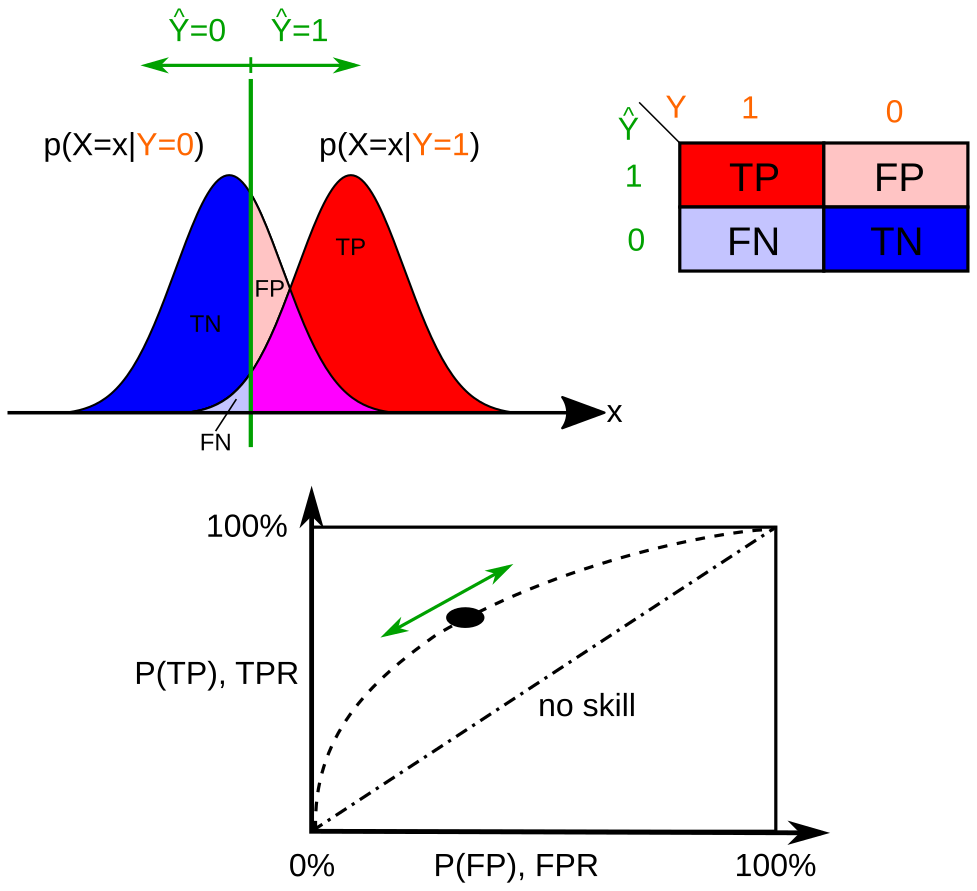

[ROC Curve](https://en.wikipedia.org/wiki/File:ROC_curves.svg)

## **The AUC score**

**The ROC curve** allows a visual analysis; if we want to reduce the curve to a single number we can do this by calculating the **Area Under the Curve (AUC)**.

> A classifier ideally has an AUC of 1 and AUC values of different classifiers can be compared to give us a general performance averaged over different loss conditions.

>> If the two distributions overlap a lot, the ROC line drops close to the diagonal and the area below it (the **AUC**) drops towards 0.5:
>> A value of exactly 0.5 indicates that there is complete overlap, and a classifier using this feature will be no better than random choice at discriminating the classes.

>> If the two distributions are well separated, the ROC line rises and the AUC approaches 1.

In [3]:
interact(interactive_roc,
         threshold=FloatSlider(value=0.0,
                               min=min_threshold,
                               max=max_threshold,
                               step=0.1,
                               description="threshold"))

interactive(children=(FloatSlider(value=0.0, description='threshold', max=4.081480559940721, min=-3.3828160871…

<function __main__.interactive_roc(threshold=0.0)>

## **Comparing Classifiers**

ROC curves allow us to compare the performance of two different classifiers. Morover, the **AUC** is a **measure of the class discrimination ability** of the specific feature used by a (single-feature) classifier. Recently, the AUC has been used as an effective criterion to design classifiers. This

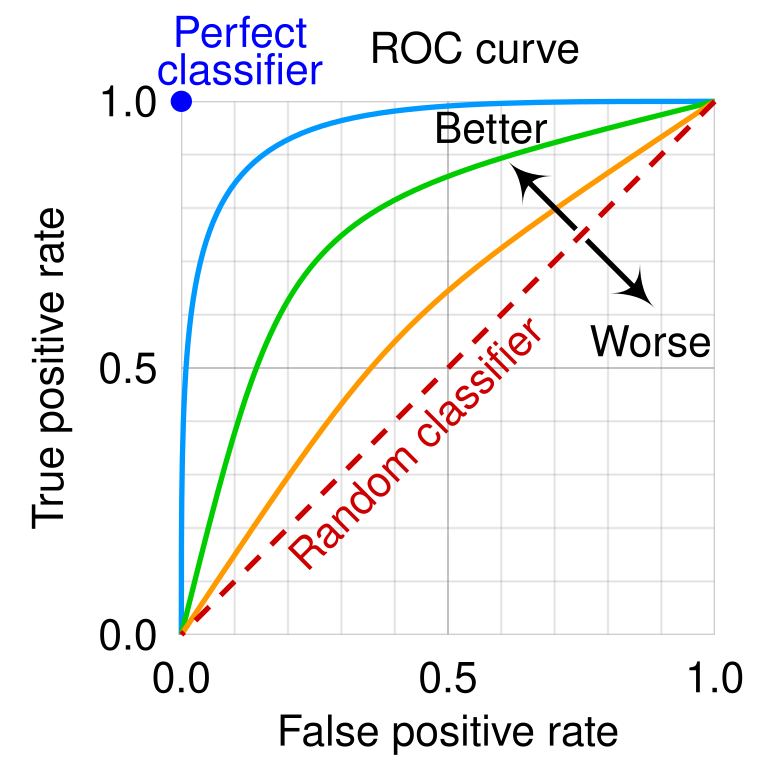

[Comparing ROC Curves](https://en.wikipedia.org/wiki/File:Roc_curve.svg)

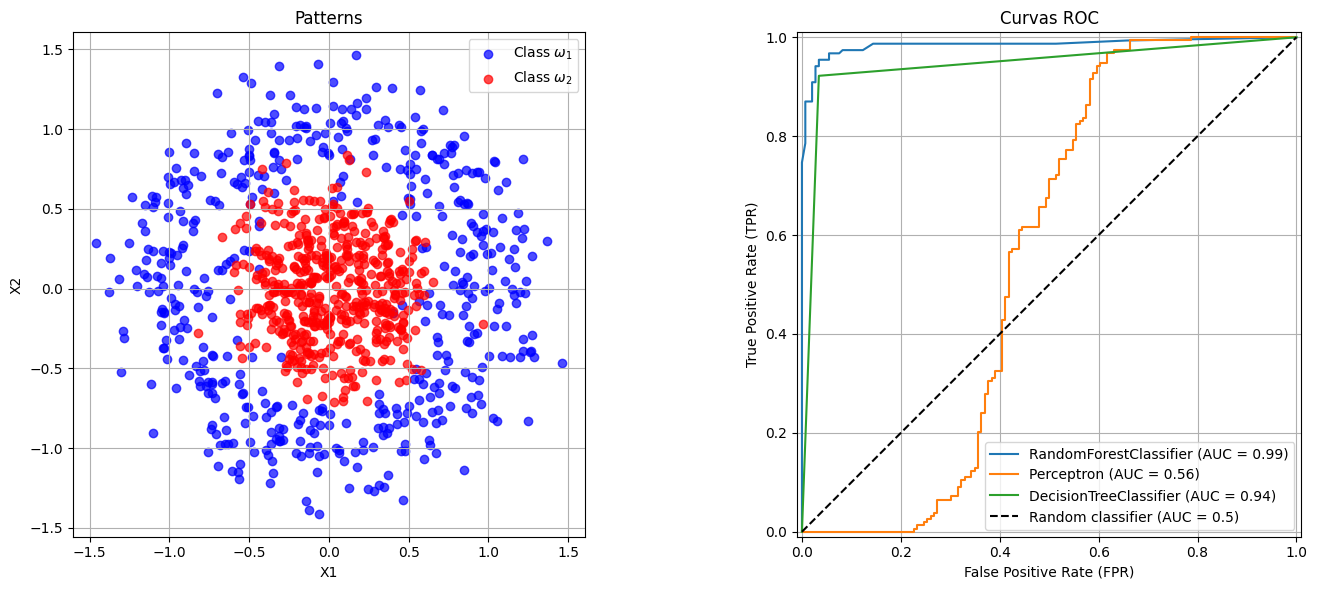

In [4]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier

X, y = make_circles(n_samples=1000, noise=0.2, factor=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Perceptron': Perceptron(max_iter=100),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy")
}

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue", label=r"Class $\omega_1$", alpha=0.7)
axes[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red", label=r"Class $\omega_2$", alpha=0.7)
axes[0].set_title("Patterns")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")
axes[0].legend()
axes[0].grid(True)
axes[0].set_aspect("equal")

for name, model in models.items():
    model.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax = axes[1])
axes[1].plot([0, 1], [0, 1], 'k--', label="Random classifier (AUC = 0.5)")
axes[1].set_title("Curvas ROC")
axes[1].set_xlabel("False Positive Rate (FPR)")
axes[1].set_ylabel("True Positive Rate (TPR)")
axes[1].legend(loc="lower right")
axes[1].grid(True)
plt.tight_layout()
axes[1].set_aspect("equal")
plt.show()

# **Multiclass ROC**

ROC curves are most commonly used in binary classification, where the true positive fraction (TPF) and false positive fraction (FPF) are clearly defined.

For **multiclass classification**, TPF and FPF can only be determined after binarizing the outputs. This can be achieved in two ways:
- **One-vs-Rest (OvR)**: Each class is compared against all other classes combined into a single group.
- **One-vs-One (OvO)**: Every unique pair of classes is compared independently.

# **References**

- Dougherty, G. (2013) *Pattern Recognition and Classification. An Introduction**, Springer.

- Theodoridis, S. \& Koutroumbas, K. (2009) *Pattern Recognition*, 4th ed., Academic Press.

- Scikit-Learn. *Supervised Learning* https://scikit-learn.org/stable/supervised_learning.html